In [1]:
'''
Loads the numpy variables which stores the entire history of the colony and can plot it.
To be run after the yeast colony simulation script. 
'''

'\nLoads the numpy variables which stores the entire history of the colony and can plot it.\nTo be run after the yeast colony simulation script. \n'

In [2]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import sys 
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import colors
import matplotlib.animation as animation
matplotlib.rcParams['figure.figsize'] = [15, 12]
from IPython.display import HTML


font = {'family' : 'sans',
        'weight' : 'regular',
        'size'   : 14}
#         'size'   : 32}

matplotlib.rc('font', **font)
yeast_cmap=colors.ListedColormap(['white',"#aaaaaa", "#000000", "#b35900"])

In [3]:
resourcefilename = 'Resource.npy'
Resource = np.load(resourcefilename)
filename = 'Colony.npy'
ColonyTime = np.load(filename)

1387


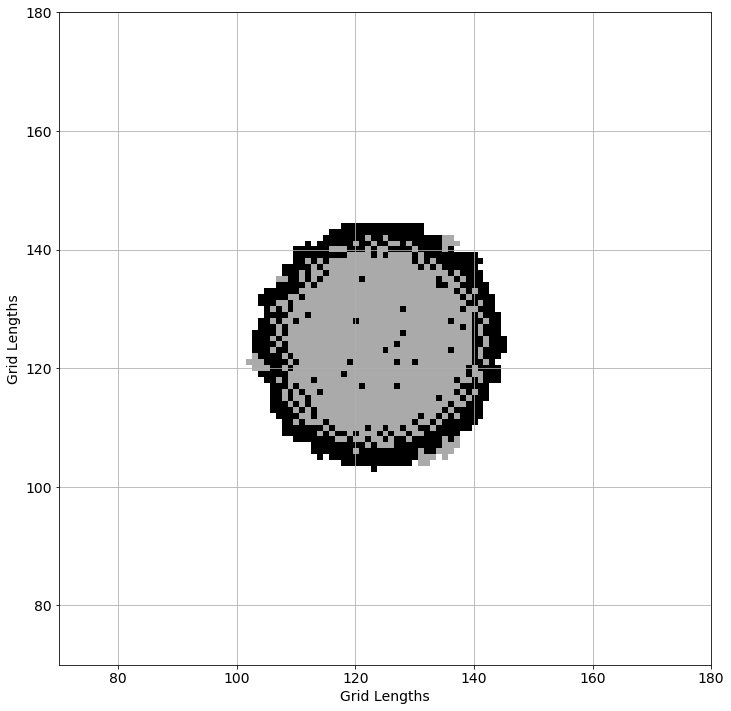

In [4]:
#Colony state plotter. Set i to get the state of the colony at the i-th time-step. 
i=-1 
POP = np.where(ColonyTime[i]>0)
print (len(POP[0])) #population size at time-step i

plt.figure()
plt.axis([70,180,70,180])
plt.imshow(ColonyTime[i].transpose(), origin="lower",cmap=yeast_cmap,interpolation='nearest',vmin=0,vmax=4)
plt.grid(True)
plt.xlabel('Grid Lengths')
plt.ylabel('Grid Lengths')
figname=filename[0:-4]
plt.savefig(figname+"_"+str(i)+".svg", ext="svg",dpi=300)
plt.savefig(figname+"_"+str(i)+".png", ext="png",dpi=300)


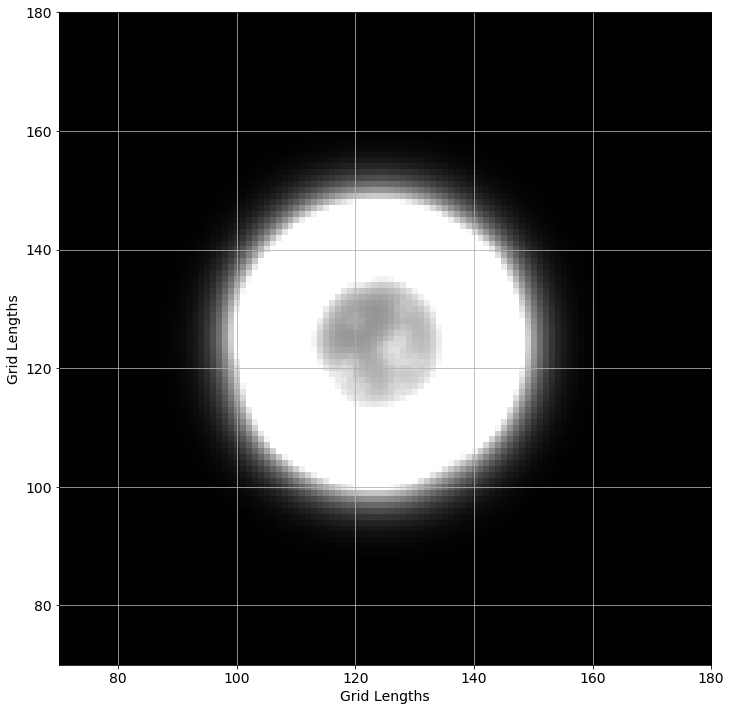

In [5]:
#Resource state plotter. Set i to get the state of the resource grid at the i-th time-step. 

i=-1

plt.figure()
plt.axis([70,180,70,180])
plt.imshow(Resource[i].transpose(), origin="lower",cmap="gray",interpolation='none',vmin=0,vmax=1.0)
plt.grid(True)
plt.xlabel('Grid Lengths')
plt.ylabel('Grid Lengths')
figname=resourcefilename[0:-4]
plt.savefig(figname+"_"+str(i)+".svg", ext="svg",dpi=300)
plt.savefig(figname+"_"+str(i)+".png", ext="png",dpi=300)

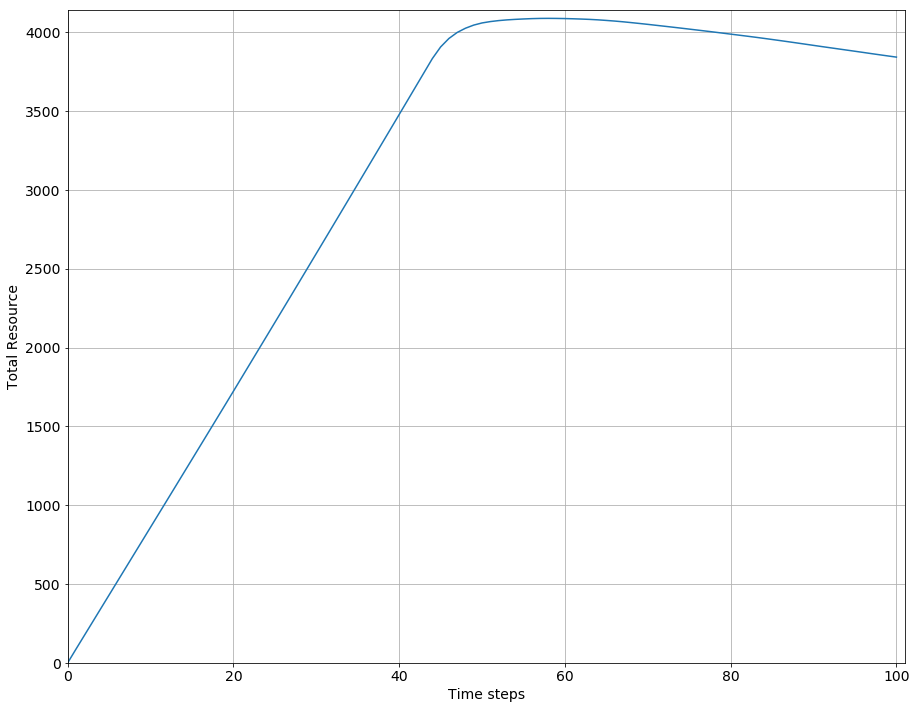

In [6]:
#Total externally available resource over time. 
TotResource = [sum(sum(Resource[a])) for a in np.arange(len(Resource))]
plt.figure()
plt.grid(True)
plt.plot(TotResource)
plt.axis([0,len(Resource),0,max(TotResource)+50])
plt.xlabel('Time steps');plt.ylabel('Total Resource')
figname="resource_vs_time"
plt.savefig(figname+"_"+str(i)+".svg", ext="svg",dpi=300)
plt.savefig(figname+"_"+str(i)+".png", ext="png",dpi=300)


In [7]:
## Movie frames for Colony grid
# fig = plt.figure()
# ims=[]
# for i in range(0,len(ColonyTime),3):
#     im = plt.imshow(ColonyTime[i].transpose(), origin="lower",cmap=yeast_cmap,interpolation='nearest',vmin=0,vmax=4)
#     ims.append([im])

In [8]:
## Movie frames for Resource grid
# fig = plt.figure()
# ims=[]
# for i in range(0,len(Resource),3):
#     im = plt.imshow(Resource[i].transpose(), origin="lower",cmap="gray",interpolation='none',vmin=0,vmax=1.0)
#     ims.append([resim])

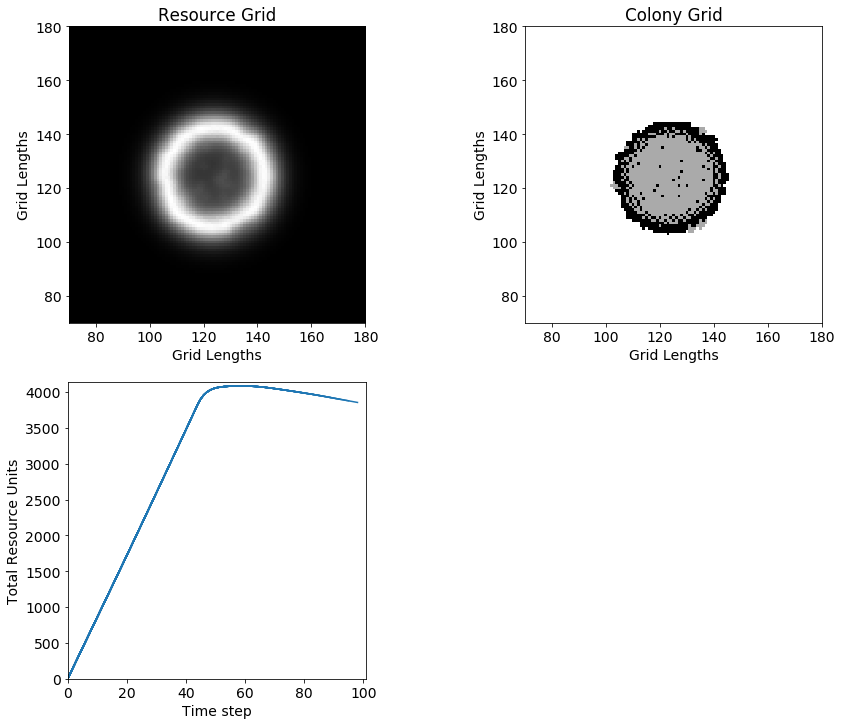

In [9]:
# subplot figure for getting frames of the resource grid, the colony grid and the total external resource over time
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis([70,180,70,180])
ax1.set_aspect(aspect='equal')
ax1.set_ylabel('Grid Lengths')
ax1.set_xlabel('Grid Lengths')
ax1.set_title('Resource Grid')

ax2 = fig.add_subplot(2,2,2)
ax2.axis([70,180,70,180])
ax2.set_aspect(aspect='equal')
ax2.set_ylabel('Grid Lengths')
ax2.set_xlabel('Grid Lengths')
ax2.set_title('Colony Grid')


ax3 = fig.add_subplot(2,2,3)
ax3.axis([0,len(Resource),0,max(TotResource)+50])
ax3.set_aspect(aspect=(len(Resource)/(max(TotResource)+80)))
ax3.set_ylabel('Total Resource Units')
ax3.set_xlabel('Time step')

resplots=[]
for i in range(0,len(TotResource),3):
    im1 = ax1.imshow(Resource[i].transpose(), origin="lower",cmap="gray",interpolation='none',vmin=0,vmax=3.0)
    im2 = ax2.imshow(ColonyTime[i].transpose(), origin="lower",cmap=yeast_cmap,interpolation='nearest',vmin=0,vmax=4)
    im3, = ax3.plot(TotResource[0:i],'#1f77b4')
    resplots.append([im1,im2,im3])
    


In [10]:
# # Movie maker for just the colony or the resource grid. 
# ani = animation.ArtistAnimation(fig, ims, interval=75, blit=True,repeat_delay=1000)
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=24, metadata=dict(artist='Me'), bitrate=1800)
# ani.save(figname+"_movie.mp4")

In [11]:
# Movie maker for the subplot figures frames
ani = animation.ArtistAnimation(fig, resplots, interval=75, blit=True,repeat_delay=1000)
from matplotlib.animation import FFMpegWriter
writer = FFMpegWriter(fps=24, metadata=dict(artist='Me'), bitrate=1800)
ani.save("colonyresource_movie.mp4")